![](./img/logo.png)

# Ejemplo G: Regresión Lineal - MultiVariable

$Sci-Kit Learn$ es un poderoso módulo de Python para el aprendizaje de máquina. 
Contiene funciones de regresión, clasificación, agrupación, selección de modelos y reducción de la dimensionalidad. 

El ejemplo se utilizará el módulo <a href="https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html">sklearn.linear_model</a> que contiene 
"métodos destinados a la regresión en los que se espera que el "Target Value" 
sea una combinación lineal de las variables de entrada".




![](./img/dict.png)

## 1.- Se cargan las bibliotecas con sus módulos correspondientes

In [1]:
## Nombre: Geman Daniel Rojas
## Materia: Progrmacion cientifica
## 
## Universidad Sergio Arboleda

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split

## 2.- Exporación y preparación del conjunto de datos 

In [3]:
data = pd.read_csv('./data/cancerLung.csv')

In [4]:
print(data.shape)

(2788, 25)


In [5]:
data.head()

,Unnamed: 0,State,AreaName,All_Poverty,M_Poverty,F_Poverty,FIPS,Med_Income,M_With,M_Without,...,Avg_Ann_Incidence,Recent_Trend,Mortality_Rate,Avg_Ann_Deaths,POPESTIMATE2015,All_Poverty_PC,All_With_PC,All_Without_PC,Rising,Falling
0,2,AK,"Anchorage Municipality, Alaska",23914,10698,13216,2020,78326.0,0,0,...,122,stable,37.6,86,298695,8006.160130,81411.808032,14944.341218,0,0
1,3,AK,"Bethel Census Area, Alaska",4364,2199,2165,2050,51012.0,0,0,...,5,rising,44.5,4,17946,24317.396634,72567.703109,24974.924774,1,0
2,7,AK,"Fairbanks North Star Borough, Alaska",7752,3523,4229,2090,71068.0,0,0,...,37,stable,45.4,29,99631,7780.710823,81114.311811,12324.477321,0,0
3,9,AK,"Juneau City and Borough, Alaska",2110,1145,965,2110,85746.0,0,0,...,12,stable,41.6,10,32756,6441.567957,83407.619978,14183.661009,0,0
4,10,AK,"Kenai Peninsula Borough, Alaska",5558,2596,2962,2122,63684.0,0,0,...,41,stable,43.3,28,58059,9573.020548,75886.598116,20441.275254,0,0


In [6]:
data.tail()

,Unnamed: 0,State,AreaName,All_Poverty,M_Poverty,F_Poverty,FIPS,Med_Income,M_With,M_Without,...,Avg_Ann_Incidence,Recent_Trend,Mortality_Rate,Avg_Ann_Deaths,POPESTIMATE2015,All_Poverty_PC,All_With_PC,All_Without_PC,Rising,Falling
2783,3127,WY,"Sheridan County, Wyoming",2381,1210,1171,56033,55455.0,0,0,...,19,stable,34.3,14,30009,7934.286381,86970.575494,10576.826952,0,0
2784,3129,WY,"Sweetwater County, Wyoming",5058,2177,2881,56037,69022.0,0,0,...,18,stable,37.2,13,44626,11334.199794,86252.408910,13447.317707,0,0
2785,3130,WY,"Teton County, Wyoming",1638,1026,612,56039,75325.0,0,0,...,4,stable,15.9,3,23125,7083.243243,80012.972973,16216.216216,0,0
2786,3131,WY,"Uinta County, Wyoming",2845,1453,1392,56041,56569.0,0,0,...,7,stable,32.0,6,20822,13663.432908,85693.017001,14004.418404,0,0
2787,3132,WY,"Washakie County, Wyoming",1137,489,648,56043,47652.0,0,0,...,5,stable,34.0,4,8328,13652.737752,82120.557157,16738.712776,0,0


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2788 entries, 0 to 2787
Data columns (total 25 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         2788 non-null   int64  
 1   State              2788 non-null   object 
 2   AreaName           2788 non-null   object 
 3   All_Poverty        2788 non-null   int64  
 4   M_Poverty          2788 non-null   int64  
 5   F_Poverty          2788 non-null   int64  
 6   FIPS               2788 non-null   int64  
 7   Med_Income         2788 non-null   float64
 8   M_With             2788 non-null   int64  
 9   M_Without          2788 non-null   int64  
 10  F_With             2788 non-null   int64  
 11  F_Without          2788 non-null   int64  
 12  All_With           2788 non-null   int64  
 13  All_Without        2788 non-null   int64  
 14  Incidence_Rate     2788 non-null   float64
 15  Avg_Ann_Incidence  2788 non-null   object 
 16  Recent_Trend       2788 

In [22]:
data = data.drop('Unnamed: 0',axis=1)

In [23]:
data.isnull().sum()

State                0
AreaName             0
All_Poverty          0
M_Poverty            0
F_Poverty            0
FIPS                 0
Med_Income           0
M_With               0
M_Without            0
F_With               0
F_Without            0
All_With             0
All_Without          0
Incidence_Rate       0
Avg_Ann_Incidence    0
Recent_Trend         0
Mortality_Rate       0
Avg_Ann_Deaths       0
POPESTIMATE2015      0
All_Poverty_PC       0
All_With_PC          0
All_Without_PC       0
Rising               0
Falling              0
dtype: int64

In [24]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
All_Poverty,2788.0,17041.352224,57601.034304,222.000000,2370.750000,5089.500000,12175.250000,1.800265e+06
M_Poverty,2788.0,7640.876255,26093.874223,80.000000,1068.000000,2252.000000,5471.500000,8.236120e+05
F_Poverty,2788.0,9400.475968,31521.734581,116.000000,1323.250000,2826.000000,6793.000000,9.766530e+05
FIPS,2788.0,30124.005739,15171.542891,1001.000000,18134.500000,29056.000000,45009.500000,5.604300e+04
Med_Income,2788.0,46808.544476,12345.415018,19328.000000,38694.750000,45038.000000,52170.500000,1.234530e+05
M_With,2788.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00
M_Without,2788.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00
F_With,2788.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00
F_Without,2788.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00
All_With,2788.0,96786.675395,284574.510293,2467.000000,12678.750000,26265.500000,67967.750000,8.134459e+06


In [25]:
data.dtypes.value_counts()

int64      14
float64     6
object      4
dtype: int64

## 3.- Visualización de los Datos (Selección de Variables Independientes $features$)
- Dispersión par por variables
- Gráfica de Distribución (Baja distribución "no ayuda a la predición de $Target$")
- Gráfica de Matriz de Correlación (relación con la variable $Target$)

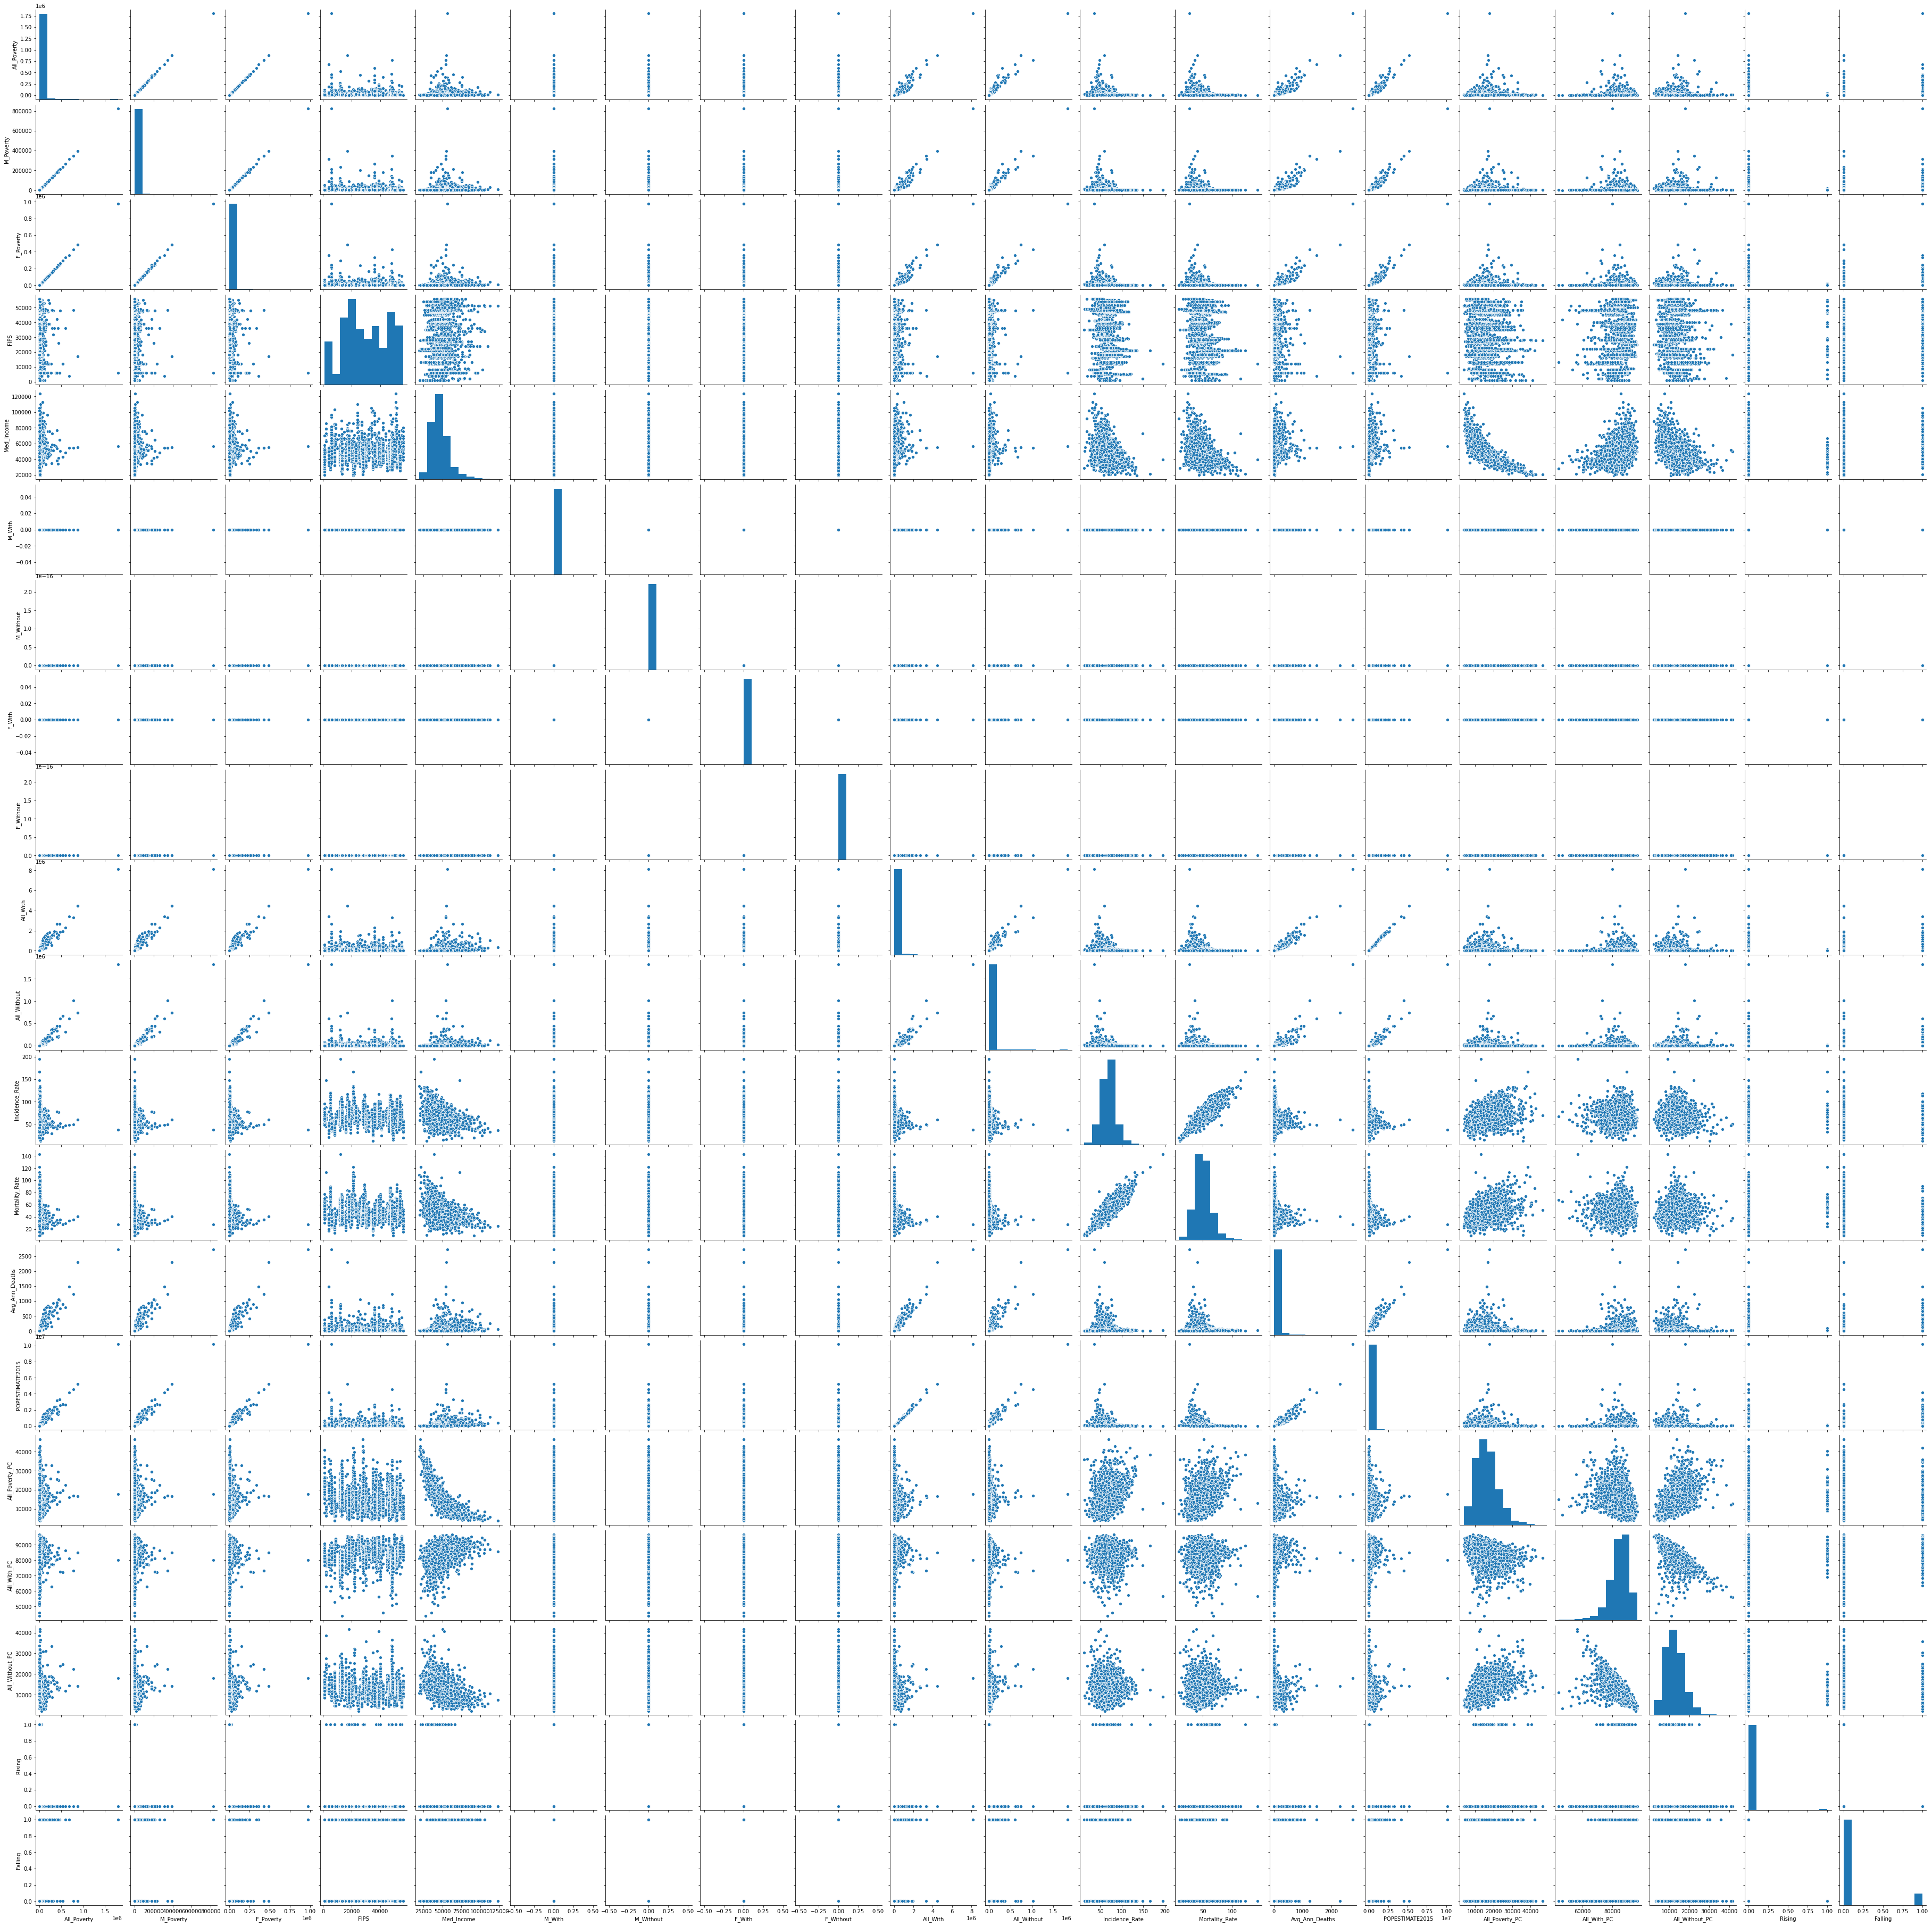

In [51]:
sns.pairplot(data)

/home/droro/Documents/CientificaScripts/env/lib/python3.6/site-packages/seaborn/distributions.py:283: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
/home/droro/Documents/CientificaScripts/env/lib/python3.6/site-packages/seaborn/distributions.py:283: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
/home/droro/Documents/CientificaScripts/env/lib/python3.6/site-packages/seaborn/distributions.py:283: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
/home/droro/Documents/CientificaScripts/env/lib/python3.6/site-packages/seaborn/distributions.py:283: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)


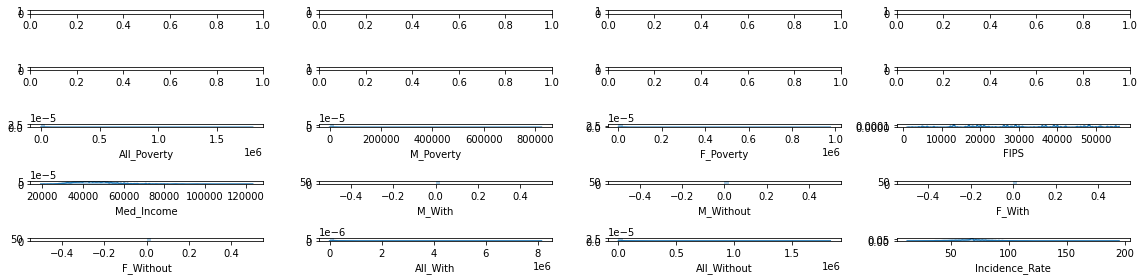

In [52]:
### Visualizar la distribucion de las variables

filas = 5
columnas = 4

fig, ax = plt.subplots(nrows=filas, ncols=columnas, figsize=(16,4))
columna = data.columns
index = 0 

for i in range(filas):
    for j in range (columnas):
        if(data[columna[index]].dtype == 'object'):index+=1; break;
        sns.distplot(data[columna[index]], ax = ax[i][j], kde_kws={'bw':0.1})
        index = index+1;
plt.tight_layout()#### ????

In [26]:
matrixCorrelacion = data.corr()
matrixCorrelacion

,All_Poverty,M_Poverty,F_Poverty,FIPS,Med_Income,M_With,M_Without,F_With,F_Without,All_With,All_Without,Incidence_Rate,Mortality_Rate,Avg_Ann_Deaths,POPESTIMATE2015,All_Poverty_PC,All_With_PC,All_Without_PC,Rising,Falling
All_Poverty,1.000000,0.999694,0.999791,-0.057213,0.129091,NaN,NaN,NaN,NaN,0.959269,0.965665,-0.154401,-0.164123,0.910669,0.968297,0.021456,-0.044311,0.049019,-0.025262,0.253568
M_Poverty,0.999694,1.000000,0.998979,-0.058565,0.127630,NaN,NaN,NaN,NaN,0.958847,0.966673,-0.155398,-0.164625,0.908364,0.968176,0.022302,-0.044981,0.049959,-0.025128,0.252923
F_Poverty,0.999791,0.998979,1.000000,-0.056066,0.130240,NaN,NaN,NaN,NaN,0.959175,0.964384,-0.153505,-0.163631,0.912156,0.967950,0.020747,-0.043736,0.048218,-0.025361,0.253984
FIPS,-0.057213,-0.058565,-0.056066,1.000000,0.083700,NaN,NaN,NaN,NaN,-0.054801,-0.048298,-0.104908,-0.094780,-0.058933,-0.054198,-0.137101,0.003392,-0.024690,-0.023750,-0.114035
Med_Income,0.129091,0.127630,0.130240,0.083700,1.000000,NaN,NaN,NaN,NaN,0.273748,0.146286,-0.389305,-0.465298,0.240963,0.256312,-0.786348,0.315224,-0.455465,-0.043651,0.194551
M_With,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
M_Without,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
F_With,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
F_Without,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
All_With,0.959269,0.958847,0.959175,-0.054801,0.273748,NaN,NaN,NaN,NaN,1.000000,0.935845,-0.186290,-0.208807,0.955112,0.997965,-0.086351,0.015409,-0.032251,-0.030899,0.302528


In [27]:
matrixCorrelacion = matrixCorrelacion.fillna(0) ## Se eliminan las columnas que la suma de sus correlaciones sea 0  
for value in matrixCorrelacion.columns:
    s = matrixCorrelacion[value].sum()
    if(s == 0):
        matrixCorrelacion = matrixCorrelacion.drop([value],axis=1)
        

In [28]:
matrixCorrelacion = matrixCorrelacion.fillna(0) ## Se eliminan las filas que la suma  de sus correlaciones sea 0  
for value in matrixCorrelacion.index:
    s = matrixCorrelacion.loc[value,:].sum()
    if(s == 0):
        matrixCorrelacion = matrixCorrelacion.drop([value])
        

In [29]:
matrixCorrelacion

,All_Poverty,M_Poverty,F_Poverty,FIPS,Med_Income,All_With,All_Without,Incidence_Rate,Mortality_Rate,Avg_Ann_Deaths,POPESTIMATE2015,All_Poverty_PC,All_With_PC,All_Without_PC,Rising,Falling
All_Poverty,1.000000,0.999694,0.999791,-0.057213,0.129091,0.959269,0.965665,-0.154401,-0.164123,0.910669,0.968297,0.021456,-0.044311,0.049019,-0.025262,0.253568
M_Poverty,0.999694,1.000000,0.998979,-0.058565,0.127630,0.958847,0.966673,-0.155398,-0.164625,0.908364,0.968176,0.022302,-0.044981,0.049959,-0.025128,0.252923
F_Poverty,0.999791,0.998979,1.000000,-0.056066,0.130240,0.959175,0.964384,-0.153505,-0.163631,0.912156,0.967950,0.020747,-0.043736,0.048218,-0.025361,0.253984
FIPS,-0.057213,-0.058565,-0.056066,1.000000,0.083700,-0.054801,-0.048298,-0.104908,-0.094780,-0.058933,-0.054198,-0.137101,0.003392,-0.024690,-0.023750,-0.114035
Med_Income,0.129091,0.127630,0.130240,0.083700,1.000000,0.273748,0.146286,-0.389305,-0.465298,0.240963,0.256312,-0.786348,0.315224,-0.455465,-0.043651,0.194551
All_With,0.959269,0.958847,0.959175,-0.054801,0.273748,1.000000,0.935845,-0.186290,-0.208807,0.955112,0.997965,-0.086351,0.015409,-0.032251,-0.030899,0.302528
All_Without,0.965665,0.966673,0.964384,-0.048298,0.146286,0.935845,1.000000,-0.163973,-0.167928,0.865652,0.955694,-0.011005,-0.082636,0.089699,-0.023036,0.221836
Incidence_Rate,-0.154401,-0.155398,-0.153505,-0.104908,-0.389305,-0.186290,-0.163973,1.000000,0.869428,-0.124910,-0.185758,0.312485,0.003091,0.023021,0.056864,-0.174738
Mortality_Rate,-0.164123,-0.164625,-0.163631,-0.094780,-0.465298,-0.208807,-0.167928,0.869428,1.000000,-0.152222,-0.205195,0.398964,-0.082118,0.133554,0.056999,-0.151374
Avg_Ann_Deaths,0.910669,0.908364,0.912156,-0.058933,0.240963,0.955112,0.865652,-0.124910,-0.152222,1.000000,0.947752,-0.078564,0.031754,-0.044939,-0.034194,0.303944


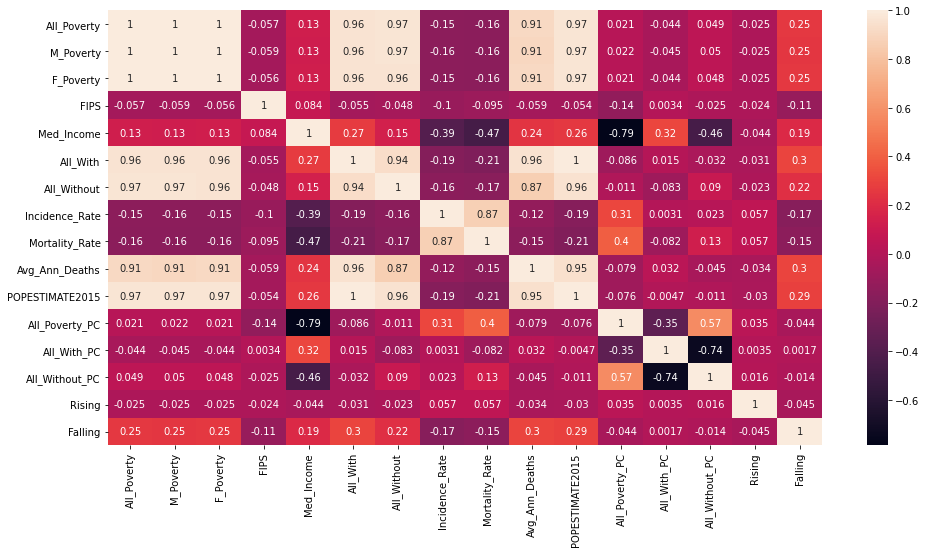

In [30]:
fig, ax = plt.subplots(figsize = (16,8))
sns.heatmap(matrixCorrelacion, annot=True)

In [31]:
matrixCorrelacion.index

Index(['All_Poverty', 'M_Poverty', 'F_Poverty', 'FIPS', 'Med_Income',
       'All_With', 'All_Without', 'Incidence_Rate', 'Mortality_Rate',
       'Avg_Ann_Deaths', 'POPESTIMATE2015', 'All_Poverty_PC', 'All_With_PC',
       'All_Without_PC', 'Rising', 'Falling'],
      dtype='object')

## 4.- A continuación se ajustará el modelo de regresión lineal y predecir.
Para estimar los coeficientes se usará el método de <a href="https://www.varsitytutors.com/hotmath/hotmath_help/spanish/topics/line-of-best-fit">Mínimos Cuadrados.</a>. 


### X = dataF.drop['target'] (o variables independientes)
### Y = dataF['target']

In [32]:
def relacionFeatures(correlacionData, umbral):
    feature = []
    valor = []
    
    for i, index in enumerate(correlacionData.index):
        if abs(correlacionData[index]) > umbral:
            feature.append(index)
            valor.append(correlacionData[index])
            
    df  = pd.DataFrame(data = valor, index = feature, columns=['Valor Correlación'])
    return df

In [35]:
## umbral > 0.45 - se selecciona des de un umbral mas bajo, ya que la correlacion entre las variables y el target no poseen mucho valor de significancia
umbral = 0.45
valorCorrelacion = relacionFeatures(matrixCorrelacion['Mortality_Rate'], umbral)
valorCorrelacion

,Valor Correlación
Med_Income,-0.465298
Incidence_Rate,0.869428
Mortality_Rate,1.000000


In [36]:
dataCorrAceptada = data[valorCorrelacion.index] ## Se selecciona la variables de importancia en el dataframe
dataCorrAceptada.head()

,Med_Income,Incidence_Rate,Mortality_Rate
0,78326.0,50.9,37.6
1,51012.0,49.2,44.5
2,71068.0,51.8,45.4
3,85746.0,44.5,41.6
4,63684.0,60.0,43.3


### Las funciones importantes a tener en cuenta al ajustar un modelo de regresión lineal son:

**lm.fit()**     -> Ajusta a un modelo lineal

**lm.predict()** -> Predecir **$Y$** usando el modelo lineal con coeficientes estimados

**lm.score()**   -> Devuelve el <a href="https://www.addlink.es/noticias/minitab/2736-como-interpretar-un-modelo-de-regresion-con-bajo-coeficiente-de-determinacion-r-cuadrado-y-bajos-valores-p">coeficiente de determinación (R$^2$)</a>. 
 
 - [Una medida de cuán bien se replican los resultados observados por el modelo, 
como la proporción de la variación total de los resultados explicada por el modelo.]
    

### Por hacer
- Selección de Variables Dep e Ind.
- División Valores en bloques de Entrenamiento y Prueba
- Ajuste a modelo lineal
- Selección del modelo lineal
- Entrenamiento del modelo
- Impresión coeficientes e intersepción.
- Diagrama de Dispersión.

In [37]:
##Variable independiente
X = dataCorrAceptada.drop(['Mortality_Rate'], axis=1)  ##
##Variable Dependiente
Y = dataCorrAceptada['Mortality_Rate']

In [38]:
x_train, x_test, y_train, y_test  = train_test_split(X,Y, test_size=0.2, random_state=0)

## 5.- Entrenamiento del Modelo

In [39]:
lm = LinearRegression()

In [41]:
ml = lm.fit(x_train,y_train)

In [43]:
print("Los coeficientes del modelo son: ", ml.coef_)
print("El punto de Inteseccion es : ",ml.intercept_)
print("Formula del modelo es : Y = {}*(x1) + {}*x2 + {} ".format(ml.coef_[0],ml.coef_[1],ml.intercept_))

Los coeficientes del modelo son:  [-1.64161523e-04  6.50781658e-01]
El punto de Inteseccion es :  12.918162549212596
Formula del modelo es : Y = -0.00016416152343939165*(x1) + 0.650781657854463*x2 + 12.918162549212596 


In [45]:
y_predict = ml.predict(x_test)

In [46]:
d = {'Predicted':y_predict,'target':y_test}
df = pd.DataFrame(data=d)
df['Predicted'] = df['Predicted'].apply(lambda x: round(x,1))
df.head(10)

,Predicted,target
1857,43.5,46.6
2256,66.1,67.6
2631,49.2,46.1
687,73.5,69.6
1191,47.5,30.8
227,32.1,28.2
1147,50.2,52.9
829,50.7,54.5
320,52.9,55.2
1760,47.9,48.1


## 6.- Métricas y Evaluación del Modelo

In [47]:
score = r2_score(y_test, y_predict)
mae = mean_absolute_error(y_test,y_predict)
mse = mean_squared_error(y_test,y_predict)

print('r2_score ',score)
print('MAE', mae)
print('MSE ',mse)

r2_score  0.813536138873665
MAE 4.597401282022443
MSE  39.834851817009046


In [48]:
## Conclusiones, el modelo posee un puntaje optimo 
## Aunque posee algo de error llamtivo  en el entrenamiento

## 7.- Pruebas con diferentes umbrales de correlación

In [49]:
total_features = []
##total_nombre_features = []
valor_correlacion = []
r2_valores = []
mse_valores = []
mae_valores = []

In [50]:
def metricas_evaluacion(features, umb, y_true, y_pred):
    puntuacion = r2_score(y_true, y_pred)
    mae = mean_absolute_error(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    
    total_features.append(len(features.columns)-1)
    valor_correlacion.append(umb)
    r2_valores.append(puntuacion)
    mse_valores.append(mse)
    mae_valores.append(mae)
    
    dfMetricas = pd.DataFrame(data=[total_features,valor_correlacion,r2_valores,mse_valores,mae_valores],
                             index=['#features','Umbral','R2','MSE','MAE'])

    return dfMetricas.T

In [52]:
### Ahora con un umbral mayor 

In [55]:
umbral = 0.6
valorCorrelacion = relacionFeatures(matrixCorrelacion['Mortality_Rate'], umbral)
valorCorrelacion

,Valor Correlación
Incidence_Rate,0.869428
Mortality_Rate,1.000000


In [57]:
dataCorrAceptada = data[valorCorrelacion.index]
dataCorrAceptada.tail()

,Incidence_Rate,Mortality_Rate
2783,43.0,34.3
2784,47.5,37.2
2785,19.0,15.9
2786,32.8,32.0
2787,42.2,34.0


In [60]:
## Entrenamiento automatico dado el "dataCorrAceptada" por su umbral

def obtener_y_predict(data_Correlacionado):
    X = dataCorrAceptada.drop(['Mortality_Rate'], axis = 1)
    y = dataCorrAceptada['Mortality_Rate']
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
    modelo = LinearRegression()
    modelo.fit(X_train, y_train)
    y_predict = modelo.predict(X_test)
    
    return y_predict

In [62]:
y_predict = obtener_y_predict(dataCorrAceptada)

In [63]:
metricas_evaluacion(dataCorrAceptada,umbral, y_test, y_predict)

,#features,Umbral,R2,MSE,MAE
0,1.0,0.6,0.79662,43.448756,4.863975
